The Lorenz attractor system
==============
Here we build the Lorenz system 

\begin{equation}
    \begin{aligned}
    \frac{d[X]}{dt} &= \sigma \cdot (Y - X) \\
    \frac{d[Y]}{dt} &= -X \cdot Z + r \cdot X -Y\\
    \frac{d[Z]}{dt} &= X \cdot Y - b \cdot Z\\
    \end{aligned}
\end{equation}

with initial conditions:

\begin{equation}
    X_0 = Y_0 = Z_0 = 10
\end{equation}

and parameters:

\begin{equation}
    \begin{aligned}
        \sigma &= 10\\
        r &= 46.92\\
        b &= 4\\
    \end{aligned}
\end{equation}

In [1]:
%matplotlib inline
import site
site.addsitedir('C:\Users\Ciaran\Documents\pycotools')
from pycotools import model, viz, tasks
import os

## Change cps variable to a location on your own system
cps = r'C:\Users\Ciaran\Documents\pycotools\docs\source\Tutorials\lorenz_attractor.cps'

## Remove the file if it exists
if os.path.isfile(cps):
    os.remove(cps)

##Use the Build context manager to build the model
with model.Build(cps) as mod:
    ## name
    mod.name = 'LorenzSystem'
    
    ## add compartment
    mod.add('compartment', name='space', initial_value=1)

    ## Add metabolites to model
    mod.add('metabolite', name='X', concentration=10)
    mod.add('metabolite', name='Y', concentration=10)
    mod.add('metabolite', name='Z', concentration=10)

    ## add reactions
    mod.add('reaction', name='X', expression='-> X; Y', rate_law='sigma*(Y-X)', parameter_values={'sigma': 10})
    mod.add('reaction', name='Y', expression='-> Y; X Z', rate_law='-X*Z + r*X -Y', parameter_values={'r': 46.92})
    mod.add('reaction', name='Z', expression='-> Z; X Y', rate_law='X*Y - b*Z', parameter_values={'b': 4})



## Get handle to the model
lorenz = model.Model(cps)

# lorenz.open()

## Run TimeCourse
TC = tasks.TimeCourse(
        lorenz, end=10,
        step_size=0.001, intervals=1000
    )



C:\Users\Ciaran\Documents\pycotools\pycotools\viz.py:117: FutureWarning: The pandas.parser module is deprecated and will be removed in a future version. Please import from the pandas.io.parser instead
  from pandas.parser import CParserError


root:INFO:25:    Initializing pycotools
root:INFO:26:    Initializing logging System
root:INFO:27:    logging config file at: C:\Users\Ciaran\Documents\pycotools\pycotools\logging_config.conf


# Visualization
## Time on x axis

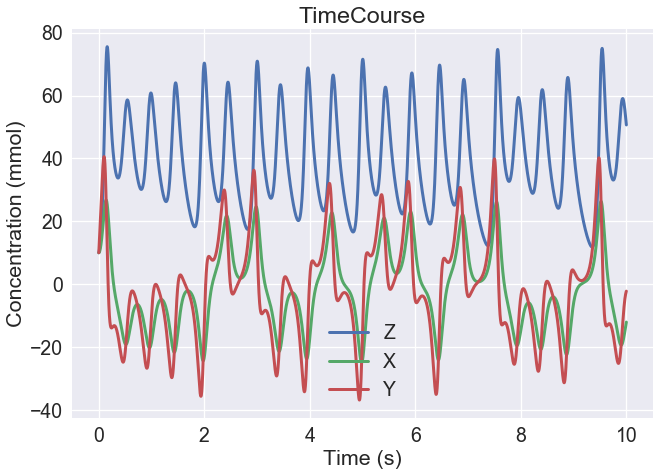

In [2]:
## Plot time courses
viz.PlotTimeCourse(TC,
    savefig=True, separate=False,
    filename='lorenz.png', x='Time'
)

## Phase Space Plots

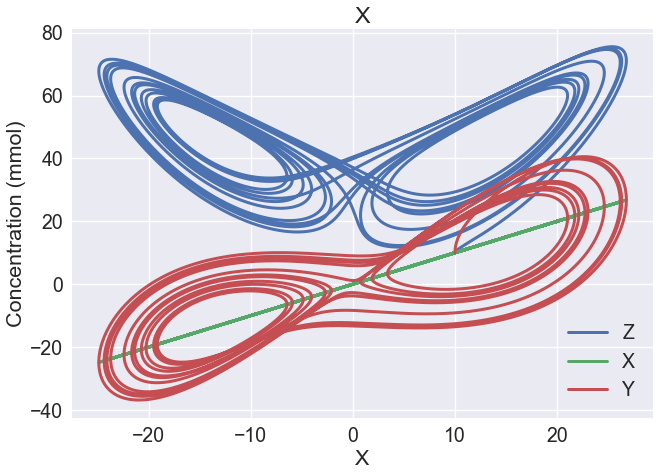

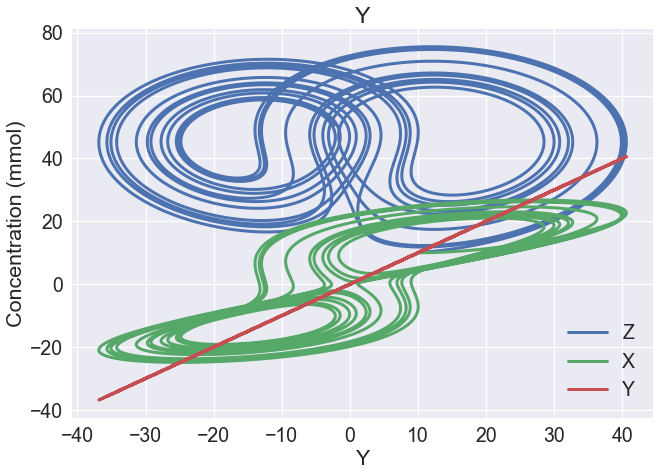

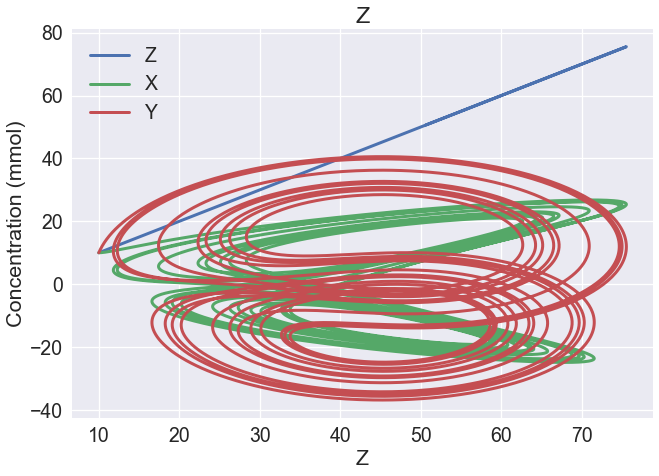

In [3]:
## Plot time courses
[viz.PlotTimeCourse(TC,
    savefig=True, separate=False,
    filename='lorenz.png', x=i, title=i) for i in ['X', 'Y', 'Z']]